In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('lending_club_loan_two.csv')
desc = pd.read_csv('lending_club_info.csv')

In [3]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\nGreggshire, VA 11650"


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394274 non-null  object 
 15  

In [9]:
df['loan_status'].head()

0     Fully Paid
1     Fully Paid
2     Fully Paid
3     Fully Paid
4    Charged Off
Name: loan_status, dtype: object

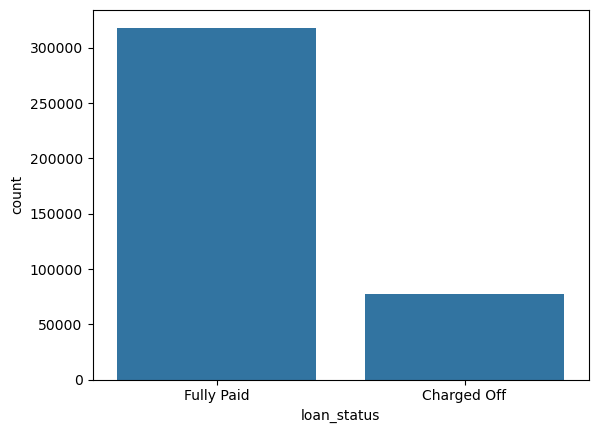

In [11]:
sns.countplot(x='loan_status', data=df)
plt.show()

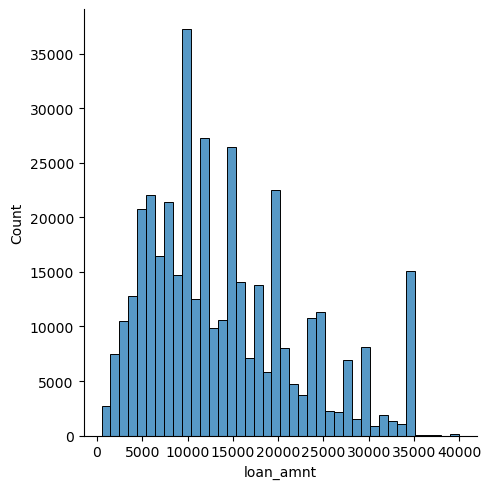

In [13]:
sns.displot(df['loan_amnt'],bins=40)
plt.show()

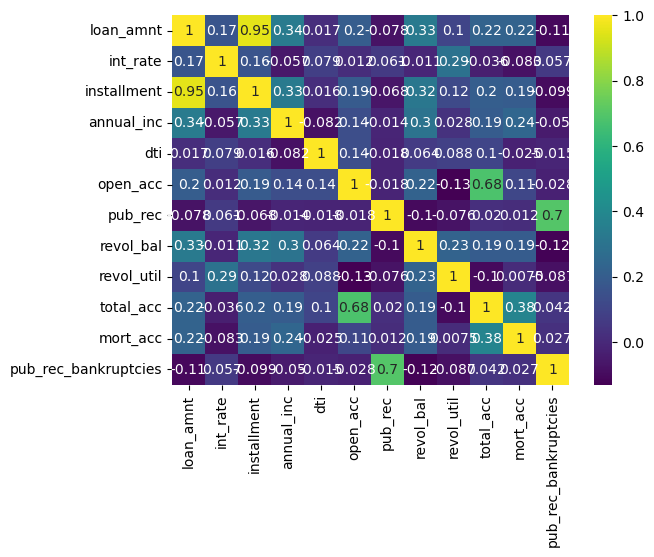

In [15]:
sns.heatmap(df.corr(numeric_only=True),annot=True, cmap = 'viridis')
plt.show()

In [17]:
df['grade'].unique()

array(['B', 'A', 'C', 'E', 'D', 'F', 'G'], dtype=object)

In [19]:
df['sub_grade'].unique()

array(['B4', 'B5', 'B3', 'A2', 'C5', 'C3', 'A1', 'B2', 'C1', 'A5', 'E4',
       'A4', 'A3', 'D1', 'C2', 'B1', 'D3', 'D5', 'D2', 'E1', 'E2', 'E5',
       'F4', 'E3', 'D4', 'G1', 'F5', 'G2', 'C4', 'F1', 'F3', 'G5', 'G4',
       'F2', 'G3'], dtype=object)

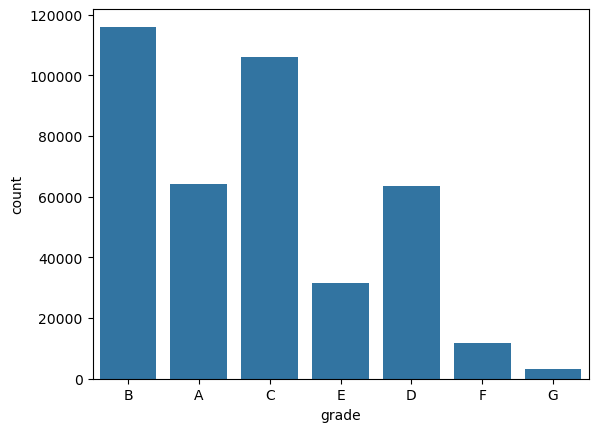

In [21]:
sns.countplot(data=df,
    x='grade')
plt.show()

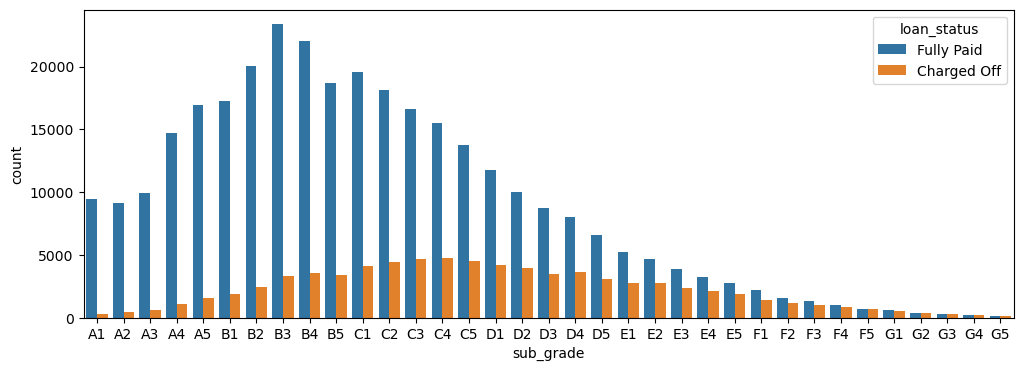

In [23]:
plt.figure(figsize=(12,4))
subgrade_order = sorted(df['sub_grade'].unique())
sns.countplot(data=df,
    x='sub_grade',hue='loan_status',order=subgrade_order)
plt.show()

In [25]:
df['loan_repaid'] = df['loan_status'].map({'Fully Paid':1,'Charged Off':0})

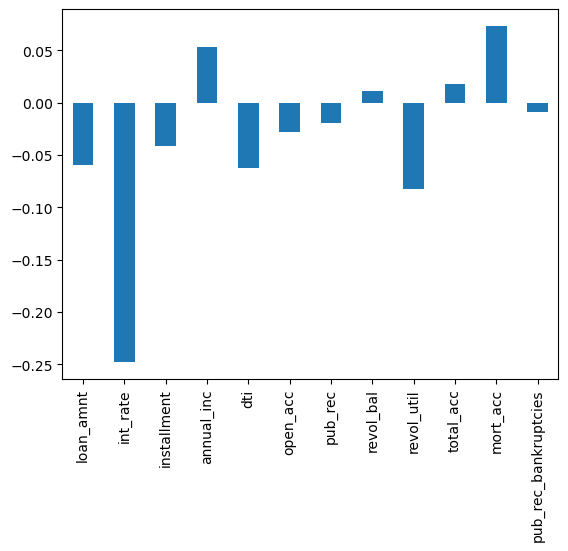

In [27]:
df.corr(numeric_only=True)['loan_repaid'][:-1].plot(kind='bar')
plt.show()

In [29]:
df.isnull().sum()/len(df)*100

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
installment             0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443401
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
loan_repaid             0.000000
dtype: float64

In [31]:
df['emp_title'].nunique()

173105

In [33]:
df['emp_length'].nunique()

11

In [35]:
df['emp_length'].head(11)

0     10+ years
1       4 years
2      < 1 year
3       6 years
4       9 years
5     10+ years
6       2 years
7     10+ years
8     10+ years
9       3 years
10      2 years
Name: emp_length, dtype: object

In [37]:
df = df.drop('emp_title',axis=1)

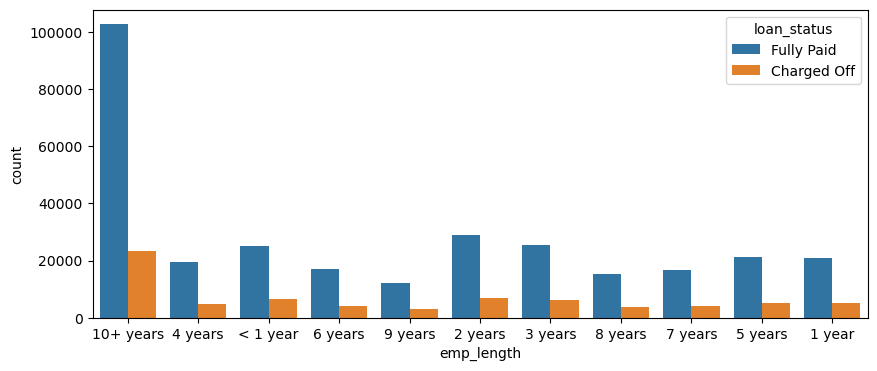

In [39]:
plt.figure(figsize=(10,4))
sns.countplot(x='emp_length',data=df,hue='loan_status')
plt.show()

In [41]:
emp_co = df[df['loan_status']=='Charged Off'].groupby("emp_length").count()['loan_status']

In [43]:
emp_fp = df[df['loan_status']=='Fully Paid'].groupby("emp_length").count()['loan_status']

In [45]:
emp_co/(emp_co+emp_fp)*100

emp_length
1 year       19.913453
10+ years    18.418610
2 years      19.326206
3 years      19.523133
4 years      19.238477
5 years      19.218721
6 years      18.919438
7 years      19.477400
8 years      19.976002
9 years      20.047016
< 1 year     20.687155
Name: loan_status, dtype: float64

In [47]:
df= df.drop('emp_length',axis=1)

In [49]:
df['purpose'].unique()

array(['vacation', 'debt_consolidation', 'credit_card',
       'home_improvement', 'small_business', 'major_purchase', 'other',
       'medical', 'wedding', 'car', 'moving', 'house', 'educational',
       'renewable_energy'], dtype=object)

In [51]:
df['purpose'].value_counts()

purpose
debt_consolidation    234507
credit_card            83019
home_improvement       24030
other                  21185
major_purchase          8790
small_business          5701
car                     4697
medical                 4196
moving                  2854
vacation                2452
house                   2201
wedding                 1812
renewable_energy         329
educational              257
Name: count, dtype: int64

In [53]:
df['title'].value_counts()

title
Debt consolidation            152472
Credit card refinancing        51487
Home improvement               15264
Other                          12930
Debt Consolidation             11608
                               ...  
Graduation/Travel Expenses         1
Daughter's Wedding Bill            1
gotta move                         1
creditcardrefi                     1
Toxic Debt Payoff                  1
Name: count, Length: 48816, dtype: int64

In [55]:
df = df.drop('title',axis=1)

In [57]:
df['mort_acc'].value_counts()

mort_acc
0.0     139777
1.0      60416
2.0      49948
3.0      38049
4.0      27887
5.0      18194
6.0      11069
7.0       6052
8.0       3121
9.0       1656
10.0       865
11.0       479
12.0       264
13.0       146
14.0       107
15.0        61
16.0        37
17.0        22
18.0        18
19.0        15
20.0        13
24.0        10
22.0         7
21.0         4
25.0         4
27.0         3
32.0         2
31.0         2
23.0         2
26.0         2
28.0         1
30.0         1
34.0         1
Name: count, dtype: int64

In [59]:
df.corr(numeric_only=True)['mort_acc'].sort_values()

int_rate               -0.082583
dti                    -0.025439
revol_util              0.007514
pub_rec                 0.011552
pub_rec_bankruptcies    0.027239
loan_repaid             0.073111
open_acc                0.109205
installment             0.193694
revol_bal               0.194925
loan_amnt               0.222315
annual_inc              0.236320
total_acc               0.381072
mort_acc                1.000000
Name: mort_acc, dtype: float64

In [61]:
total_acc_avg = df.groupby('total_acc')['mort_acc'].mean()

In [63]:
def fill_mort_acc(mort_acc, total_acc):
    if np.isnan(mort_acc):
        return total_acc_avg[total_acc]
    else:
        return mort_acc
    

In [65]:
df['mort_acc'] = df.apply(lambda x: fill_mort_acc(x['mort_acc'],x['total_acc']),axis=1)

In [67]:
df = df.dropna()

In [69]:
df.isnull().sum()

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
dti                     0
earliest_cr_line        0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
initial_list_status     0
application_type        0
mort_acc                0
pub_rec_bankruptcies    0
address                 0
loan_repaid             0
dtype: int64

In [71]:
df.select_dtypes(['object']).columns

Index(['term', 'grade', 'sub_grade', 'home_ownership', 'verification_status',
       'issue_d', 'loan_status', 'purpose', 'earliest_cr_line',
       'initial_list_status', 'application_type', 'address'],
      dtype='object')

In [73]:
df['term'].value_counts()

term
36 months    301247
60 months     93972
Name: count, dtype: int64

In [75]:
df['term'] = df['term'].apply(lambda x: int(x[:2]))

In [77]:
df=df.drop('grade',axis=1)

In [79]:
dummies = pd.get_dummies(df['sub_grade'],drop_first=True)

In [81]:
df = pd.concat([df.drop('sub_grade',axis=1),dummies],axis=1)

In [83]:
df['verification_status'].value_counts()

verification_status
Verified           139451
Source Verified    131301
Not Verified       124467
Name: count, dtype: int64

In [85]:
dummies2 = pd.get_dummies(df[['verification_status','application_type','initial_list_status','purpose']],drop_first=True)
df = pd.concat([df.drop(['verification_status','application_type','initial_list_status','purpose'],axis=1),dummies2],axis=1)

In [87]:
df['home_ownership'].value_counts()

home_ownership
MORTGAGE    198022
RENT        159395
OWN          37660
OTHER          110
NONE            29
ANY              3
Name: count, dtype: int64

In [89]:
df['home_ownership'] = df['home_ownership'].replace(['NONE','ANY'],'OTHER')

In [93]:
dummies3 = pd.get_dummies(['home_ownership'],drop_first=True)
df = pd.concat((df.drop(['home_ownership'],axis=1),dummies3),axis=1)

In [95]:
df['address']

0              0174 Michelle Gateway\nMendozaberg, OK 22690
1           1076 Carney Fort Apt. 347\nLoganmouth, SD 05113
2           87025 Mark Dale Apt. 269\nNew Sabrina, WV 05113
3                     823 Reid Ford\nDelacruzside, MA 00813
4                      679 Luna Roads\nGreggshire, VA 11650
                                ...                        
396025       12951 Williams Crossing\nJohnnyville, DC 30723
396026    0114 Fowler Field Suite 028\nRachelborough, LA...
396027     953 Matthew Points Suite 414\nReedfort, NY 70466
396028    7843 Blake Freeway Apt. 229\nNew Michael, FL 2...
396029          787 Michelle Causeway\nBriannaton, AR 48052
Name: address, Length: 395219, dtype: object

In [97]:
df['address'] = df['address'].apply(lambda x: x[-5:])

In [101]:
df['address'].value_counts()

address
70466    56880
22690    56413
30723    56402
48052    55811
00813    45725
29597    45393
05113    45300
11650    11210
93700    11126
86630    10959
Name: count, dtype: int64

In [103]:
dummies4 = pd.get_dummies(['address'],drop_first=True)
df = pd.concat((df.drop(['address'],axis=1),dummies4),axis=1)

In [105]:
df = df.drop('issue_d',axis=1)

In [107]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'annual_inc',
       'loan_status', 'dti', 'earliest_cr_line', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'mort_acc',
       'pub_rec_bankruptcies', 'loan_repaid', 'A2', 'A3', 'A4', 'A5', 'B1',
       'B2', 'B3', 'B4', 'B5', 'C1', 'C2', 'C3', 'C4', 'C5', 'D1', 'D2', 'D3',
       'D4', 'D5', 'E1', 'E2', 'E3', 'E4', 'E5', 'F1', 'F2', 'F3', 'F4', 'F5',
       'G1', 'G2', 'G3', 'G4', 'G5', 'verification_status_Source Verified',
       'verification_status_Verified', 'application_type_INDIVIDUAL',
       'application_type_JOINT', 'initial_list_status_w',
       'purpose_credit_card', 'purpose_debt_consolidation',
       'purpose_educational', 'purpose_home_improvement', 'purpose_house',
       'purpose_major_purchase', 'purpose_medical', 'purpose_moving',
       'purpose_other', 'purpose_renewable_energy', 'purpose_small_business',
       'purpose_vacation', 'purpose_wedding'],
      dtype='object')

In [109]:
df.select_dtypes(['object']).columns

Index(['loan_status', 'earliest_cr_line'], dtype='object')

In [111]:
df['earliest_cr_line']

0         Jun-1990
1         Jul-2004
2         Aug-2007
3         Sep-2006
4         Mar-1999
            ...   
396025    Nov-2004
396026    Feb-2006
396027    Mar-1997
396028    Nov-1990
396029    Sep-1998
Name: earliest_cr_line, Length: 395219, dtype: object

In [115]:
df['earliest_cr_line'].nunique()

684

In [117]:
df['earliest_cr_line'] = df['earliest_cr_line'].apply(lambda x : int(x[-4:]))

In [123]:
df['loan_repaid']

0         1
1         1
2         1
3         1
4         0
         ..
396025    1
396026    1
396027    1
396028    1
396029    1
Name: loan_repaid, Length: 395219, dtype: int64

In [121]:
from sklearn.model_selection import train_test_split

In [125]:
df = df.drop('loan_status',axis=1)

In [127]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('loan_repaid',axis=1), df['loan_repaid'], test_size=0.3, random_state=101)

In [129]:
from sklearn.preprocessing import MinMaxScaler

In [131]:
scaler = MinMaxScaler()

In [133]:
X_train = scaler.fit_transform(X_train)

In [135]:
X_test = scaler.transform(X_test)

In [137]:
import tensorflow as tf

In [141]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [145]:
df.columns.nunique()

67

In [147]:
model = Sequential()

model.add(Dense(67, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(33, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(17, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')

In [149]:
model.fit(x=X_train, y=y_train, epochs=25, batch_size=256, validation_data=(X_test,y_test))

Epoch 1/25
1081/1081 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.4884 - val_loss: 0.4585
Epoch 2/25
1081/1081 ━━━━━━━━━━━━━━━━━━━━ 1s 970us/step - loss: 0.4611 - val_loss: 0.4576
Epoch 3/25
1081/1081 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.4616 - val_loss: 0.4562
Epoch 4/25
1081/1081 ━━━━━━━━━━━━━━━━━━━━ 1s 951us/step - loss: 0.4581 - val_loss: 0.4565
Epoch 5/25
1081/1081 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.4572 - val_loss: 0.4563
Epoch 6/25
1081/1081 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.4562 - val_loss: 0.4555
Epoch 7/25
1081/1081 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.4551 - val_loss: 0.4552
Epoch 8/25
1081/1081 ━━━━━━━━━━━━━━━━━━━━ 1s 984us/step - loss: 0.4537 - val_loss: 0.4547
Epoch 9/25
1081/1081 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.4552 - val_loss: 0.4545
Epoch 10/25
1081/1081 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.4542 - val_loss: 0.4542
Epoch 11/25
1081/1081 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 0.4558 - val_loss: 0.4540
Epoch 12/25
1081/1081 ━━

In [159]:
losses = pd.DataFrame(model.history.history)

<Axes: >

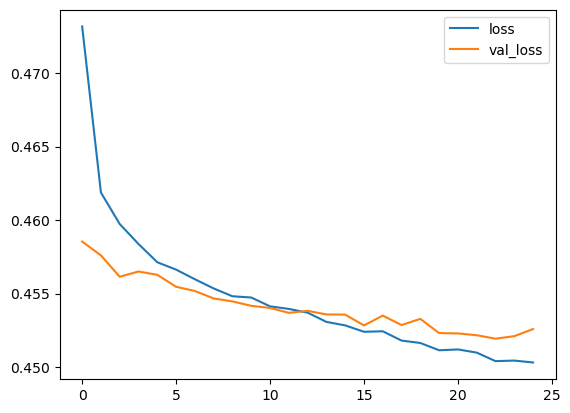

In [161]:
losses.plot()